<a href="https://colab.research.google.com/github/ShuaimingJing/CV_individual_proect1/blob/main/yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 876.6/876.6 kB 15.9 MB/s eta 0:00:00


In [2]:
import torch
from google.colab import drive
from ultralytics import YOLO
import os
import matplotlib.pyplot as plt
import pandas as pd
os.environ["WANDB_MODE"] = "disabled"

drive.mount('/content/drive')


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Mounted at /content/drive


In [3]:
!export WANDB_MODE="disabled"


# nano model

In [4]:
assert torch.cuda.is_available(), "CUDA not available. Please check your environment."
device = torch.device('cuda')
torch.cuda.set_per_process_memory_fraction(0.8, device=0)
print(f'Using device: {device}')

# Initialize the YOLOv8 model
model = YOLO('yolov8n.pt')  # YOLOv8 nano model

# Train the model and get results
results = model.train(
    data='/content/drive/MyDrive/Individual_project/YOLOv8/data.yaml',
    epochs=40,
    imgsz=224,
    lr0=0.01,
    lrf=0.1,
    mosaic=1.0,
    mixup=0.2
)



Using device: cuda


100%|██████████| 6.25M/6.25M [00:00<00:00, 78.2MB/s]


Ultralytics 8.3.18 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/Individual_project/YOLOv8/data.yaml, epochs=40, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False,

100%|██████████| 755k/755k [00:00<00:00, 15.5MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 64.5MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/Individual_project/YOLOv8/data/train_yolo/labels.cache... 257 images, 32 backgrounds, 0 corrupt: 100%|██████████| 289/289 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.18 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/Individual_project/YOLOv8/data/val_yolo/labels.cache... 66 images, 7 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40     0.382G      1.503      3.704      1.473          5        224: 100%|██████████| 19/19 [00:07<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:07<00:00,  2.40s/it]

                   all         73        109     0.0112      0.669      0.266      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40     0.352G      1.518      3.105       1.42          2        224: 100%|██████████| 19/19 [00:02<00:00,  7.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.92it/s]

                   all         73        109      0.726      0.362      0.451      0.311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40     0.354G      1.521      2.422      1.377          4        224: 100%|██████████| 19/19 [00:03<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.95it/s]

                   all         73        109      0.438      0.429      0.425      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40     0.354G      1.591      2.287       1.41          3        224: 100%|██████████| 19/19 [00:02<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.04it/s]

                   all         73        109      0.295       0.52      0.429      0.295



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40     0.375G       1.53      1.987      1.397          9        224: 100%|██████████| 19/19 [00:02<00:00,  9.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.95it/s]

                   all         73        109      0.392      0.463      0.399      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40     0.354G      1.521      1.901      1.399          4        224: 100%|██████████| 19/19 [00:02<00:00,  8.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.46it/s]

                   all         73        109      0.335      0.481      0.362      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40     0.354G      1.509      1.889      1.415          4        224: 100%|██████████| 19/19 [00:02<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.35it/s]

                   all         73        109        0.7       0.48      0.483      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40     0.354G      1.499      1.821      1.382          1        224: 100%|██████████| 19/19 [00:02<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.97it/s]

                   all         73        109      0.796      0.493       0.53       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40     0.354G      1.517      1.829      1.393         10        224: 100%|██████████| 19/19 [00:02<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.41it/s]

                   all         73        109      0.549      0.643      0.591      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40     0.354G      1.341      1.699       1.31          2        224: 100%|██████████| 19/19 [00:02<00:00,  7.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.82it/s]

                   all         73        109      0.721      0.559      0.583      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40     0.354G       1.45      1.656      1.328          1        224: 100%|██████████| 19/19 [00:02<00:00,  9.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.68it/s]

                   all         73        109      0.589      0.411      0.449      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40     0.354G      1.335      1.831      1.265          0        224: 100%|██████████| 19/19 [00:02<00:00,  7.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.19it/s]

                   all         73        109      0.509      0.392      0.491      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40     0.354G       1.46      1.654      1.374         16        224: 100%|██████████| 19/19 [00:02<00:00,  8.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.22it/s]

                   all         73        109      0.506      0.571      0.525      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40     0.354G      1.451      1.723      1.348          4        224: 100%|██████████| 19/19 [00:02<00:00,  8.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.38it/s]

                   all         73        109      0.661       0.56      0.595       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40     0.357G      1.416      1.604      1.344         11        224: 100%|██████████| 19/19 [00:02<00:00,  9.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.47it/s]

                   all         73        109      0.591      0.597      0.575      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40     0.354G       1.42      1.545      1.297         16        224: 100%|██████████| 19/19 [00:02<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.35it/s]

                   all         73        109       0.72      0.433      0.534      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40     0.354G      1.345      1.519      1.317          7        224: 100%|██████████| 19/19 [00:02<00:00,  9.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.36it/s]

                   all         73        109      0.441      0.505      0.439      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40     0.354G      1.311      1.513      1.311          2        224: 100%|██████████| 19/19 [00:02<00:00,  8.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.30it/s]

                   all         73        109       0.62      0.552      0.535      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40     0.354G      1.292      1.527      1.288          1        224: 100%|██████████| 19/19 [00:03<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.88it/s]

                   all         73        109      0.725      0.595      0.613      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40     0.354G       1.27      1.471      1.279          4        224: 100%|██████████| 19/19 [00:02<00:00,  9.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.87it/s]

                   all         73        109      0.647      0.568      0.562      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40     0.354G      1.295      1.503      1.285          1        224: 100%|██████████| 19/19 [00:02<00:00,  8.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.40it/s]

                   all         73        109      0.558      0.477      0.511      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40     0.354G      1.338      1.497      1.289          3        224: 100%|██████████| 19/19 [00:02<00:00,  9.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.13it/s]

                   all         73        109      0.663      0.534      0.597      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40     0.354G      1.274      1.388      1.277         10        224: 100%|██████████| 19/19 [00:02<00:00,  8.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.76it/s]

                   all         73        109       0.73      0.626      0.642      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40     0.354G      1.276      1.372      1.257         11        224: 100%|██████████| 19/19 [00:02<00:00,  9.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.08it/s]

                   all         73        109      0.749       0.64      0.666      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40     0.375G      1.188      1.361       1.23          1        224: 100%|██████████| 19/19 [00:02<00:00,  7.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.34it/s]

                   all         73        109      0.619      0.621      0.619      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40     0.354G      1.119      1.285      1.194          3        224: 100%|██████████| 19/19 [00:02<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.15it/s]

                   all         73        109      0.635      0.661      0.643      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40     0.375G      1.206      1.342      1.252          3        224: 100%|██████████| 19/19 [00:02<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.58it/s]

                   all         73        109      0.599      0.681      0.635      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40     0.354G      1.167      1.308      1.211          1        224: 100%|██████████| 19/19 [00:02<00:00,  7.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.65it/s]

                   all         73        109      0.769      0.627      0.649      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40     0.354G      1.169      1.274      1.184          9        224: 100%|██████████| 19/19 [00:02<00:00,  9.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.58it/s]

                   all         73        109      0.659      0.598      0.599      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40     0.354G      1.118       1.42      1.208          2        224: 100%|██████████| 19/19 [00:02<00:00,  8.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.05it/s]

                   all         73        109      0.642      0.598      0.605      0.444


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40     0.352G      1.038      1.402      1.153          1        224: 100%|██████████| 19/19 [00:05<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.12it/s]

                   all         73        109      0.673      0.578      0.567      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40     0.352G      1.148      1.445       1.12          3        224: 100%|██████████| 19/19 [00:02<00:00,  8.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.74it/s]

                   all         73        109      0.686       0.62      0.616      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40     0.352G      0.904      1.155      1.059          2        224: 100%|██████████| 19/19 [00:02<00:00,  8.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.10it/s]

                   all         73        109      0.685      0.578      0.636       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40     0.352G     0.9482      1.142      1.092          1        224: 100%|██████████| 19/19 [00:02<00:00,  8.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.88it/s]

                   all         73        109      0.686      0.653      0.659      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40     0.352G     0.9238      1.192       1.06          1        224: 100%|██████████| 19/19 [00:02<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.79it/s]

                   all         73        109      0.712      0.587      0.629      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40     0.354G     0.8772     0.9981      1.031          1        224: 100%|██████████| 19/19 [00:02<00:00,  9.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.65it/s]

                   all         73        109      0.579      0.704      0.614      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40     0.352G     0.8595      1.023      1.033          1        224: 100%|██████████| 19/19 [00:02<00:00,  9.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.50it/s]

                   all         73        109       0.64      0.679      0.644      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/40     0.352G     0.8862     0.9655      1.029          1        224: 100%|██████████| 19/19 [00:01<00:00,  9.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.26it/s]

                   all         73        109      0.735      0.665       0.66      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/40     0.352G     0.8747      1.057      1.032          1        224: 100%|██████████| 19/19 [00:01<00:00,  9.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.45it/s]

                   all         73        109      0.663      0.682      0.644      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/40     0.352G     0.8347     0.9471      1.024          1        224: 100%|██████████| 19/19 [00:02<00:00,  9.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.86it/s]

                   all         73        109      0.629      0.667      0.626      0.472



40 epochs completed in 0.045 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.18 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]


                   all         73        109      0.749      0.641      0.668      0.487
              keyboard         18         18      0.872       0.76        0.9      0.539
                 mouse         10         13      0.733      0.769      0.692      0.565
              utensils         29         57      0.491      0.187      0.175     0.0856
                laptop         20         21      0.899      0.846      0.903      0.757
Speed: 0.0ms preprocess, 0.6ms inference, 0.0ms loss, 3.6ms postprocess per image
Results saved to runs/detect/train


Final Precision: 0.7488
Final Recall: 0.6406
Final mAP@0.5: 0.6676
Final mAP@0.5:0.95: 0.4866
Bar plot of final metrics has been saved as 'final_metrics.png'

All keys in results_dict:
metrics/precision(B)
metrics/recall(B)
metrics/mAP50(B)
metrics/mAP50-95(B)
fitness


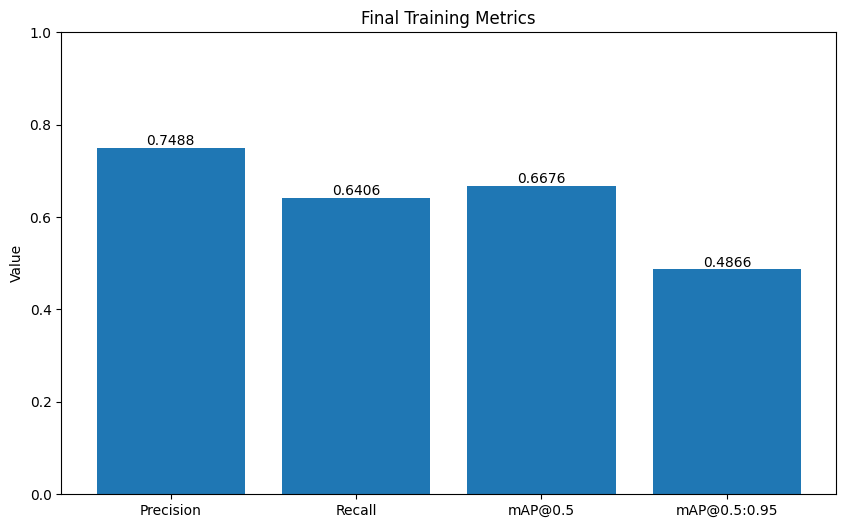

In [5]:
# Extract metrics
precision = results.results_dict['metrics/precision(B)']
recall = results.results_dict['metrics/recall(B)']
mAP50 = results.results_dict['metrics/mAP50(B)']
mAP50_95 = results.results_dict['metrics/mAP50-95(B)']

# Print the final values of the metrics
print(f"Final Precision: {precision:.4f}")
print(f"Final Recall: {recall:.4f}")
print(f"Final mAP@0.5: {mAP50:.4f}")
print(f"Final mAP@0.5:0.95: {mAP50_95:.4f}")

# Create a bar plot of the metrics
metrics = ['Precision', 'Recall', 'mAP@0.5', 'mAP@0.5:0.95']
values = [precision, recall, mAP50, mAP50_95]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values)
plt.title('Final Training Metrics')
plt.ylabel('Value')
plt.ylim(0, 1)  # Assuming these metrics are between 0 and 1
for i, v in enumerate(values):
    plt.text(i, v, f'{v:.4f}', ha='center', va='bottom')


print("Bar plot of final metrics has been saved as 'final_metrics.png'")

# Save the trained model
model.save('best_model.pt')

# If you want to see all available keys in results_dict
print("\nAll keys in results_dict:")
for key in results.results_dict.keys():
    print(key)

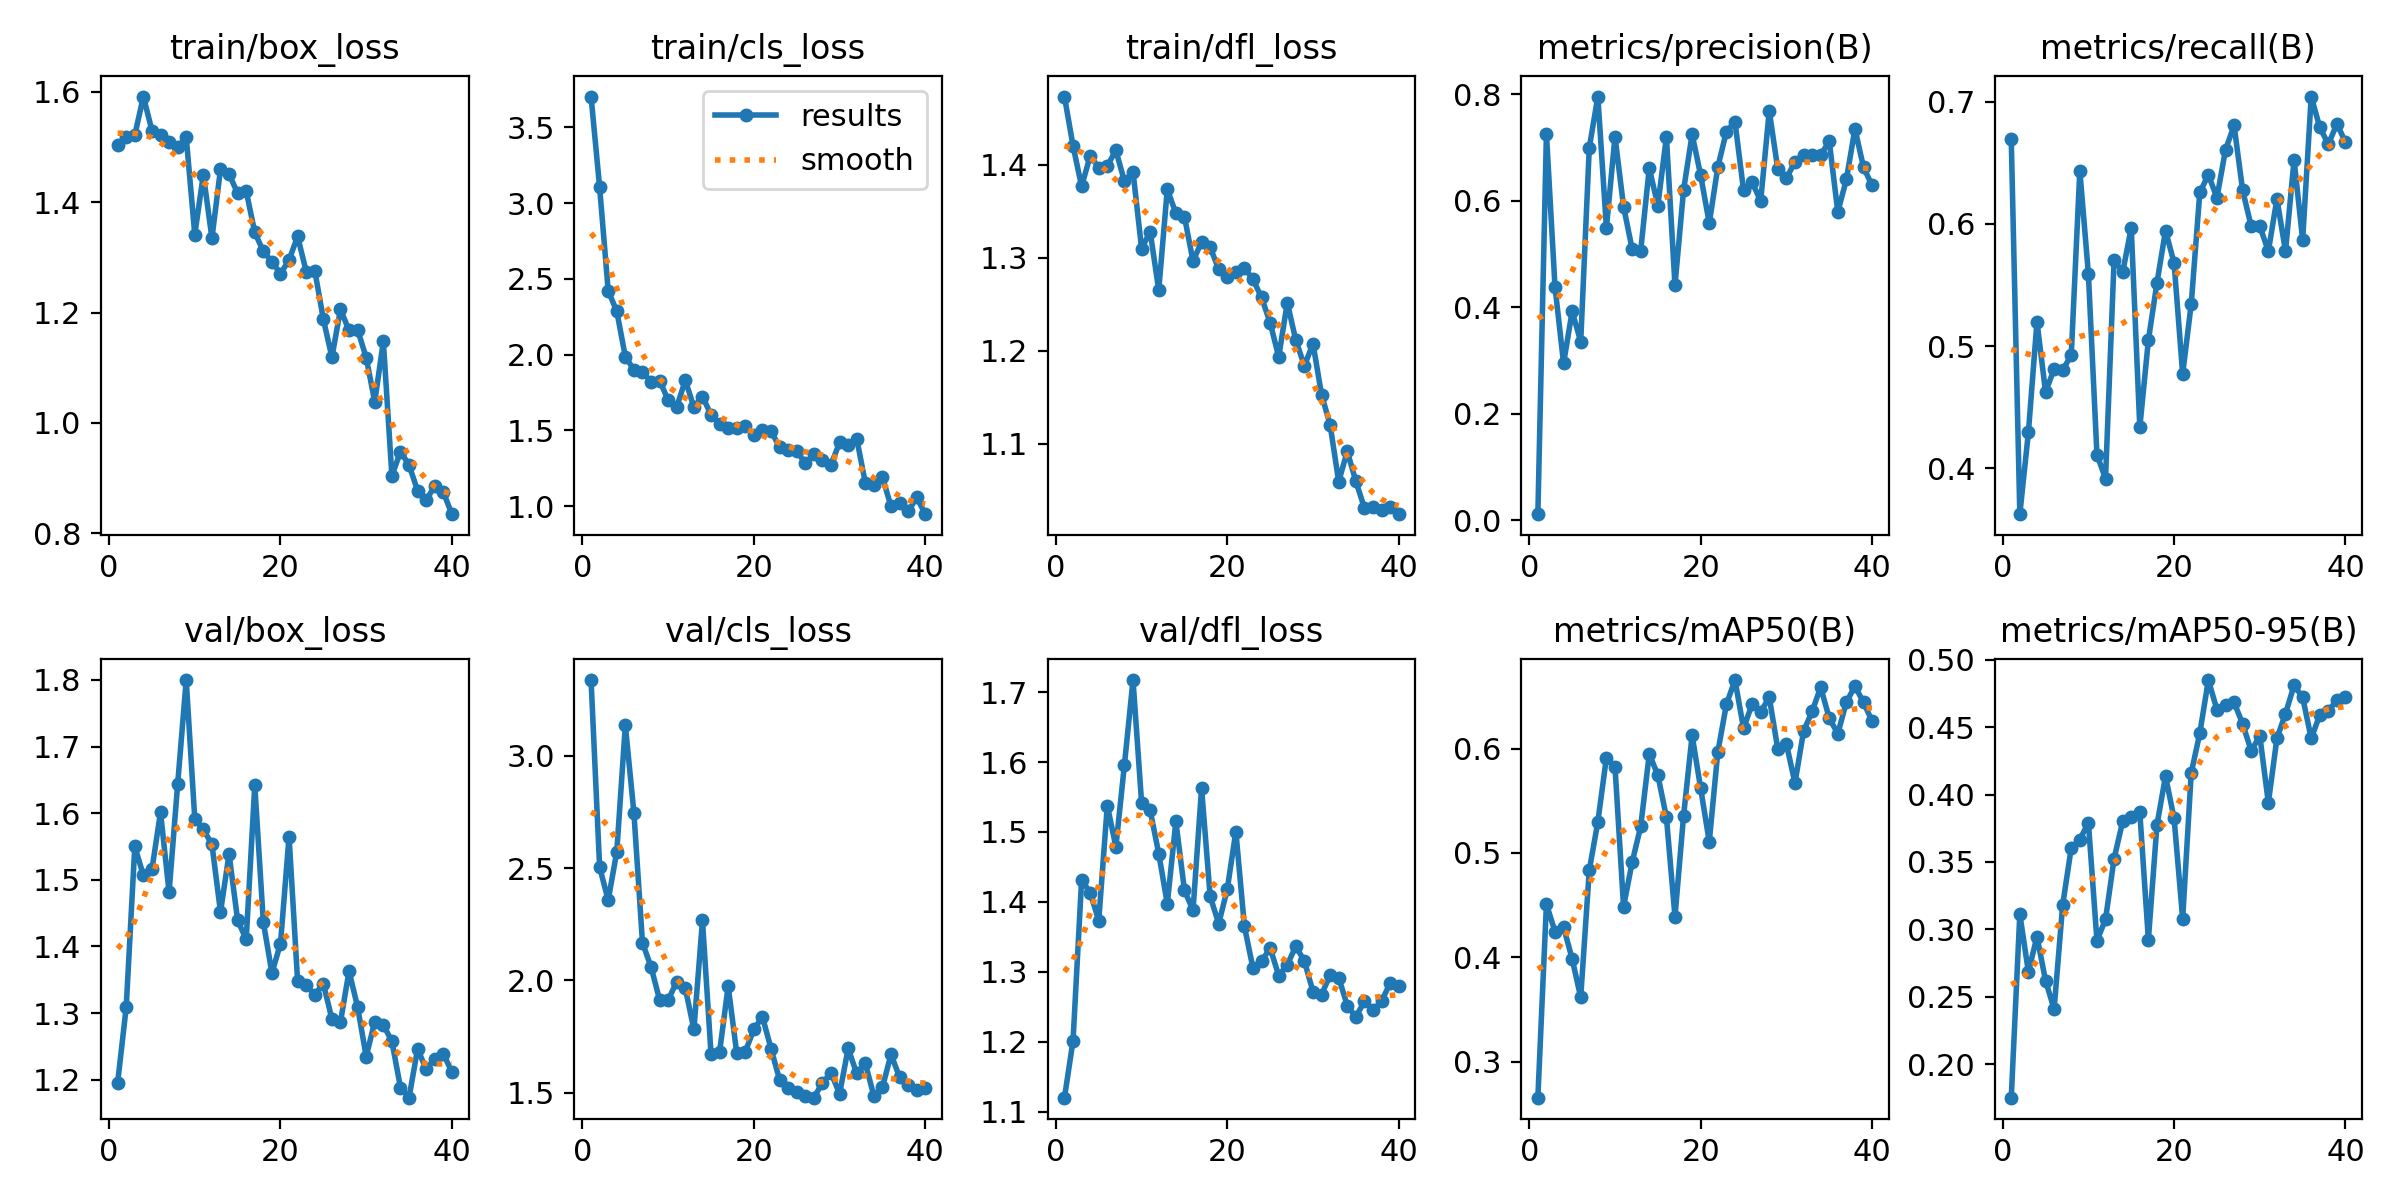

In [7]:
from IPython.display import Image, display

# Path to the image file
image_path = '/content/runs/detect/train/results.png'

# Display the image
display(Image(filename=image_path))

# small model

In [4]:
assert torch.cuda.is_available(), "CUDA not available. Please check your environment."
device = torch.device('cuda')
torch.cuda.set_per_process_memory_fraction(0.8, device=0)
print(f'Using device: {device}')

# Initialize the YOLOv8 model
model = YOLO('yolov8s.pt')  # YOLOv8 nano model

# Train the model and get results
results = model.train(
    data='/content/drive/MyDrive/Individual_project/YOLOv8/data.yaml',
    epochs=40,
    imgsz=224,
    lr0=0.01,
    lrf=0.1,
    mosaic=1.0,
    mixup=0.2
)



Using device: cuda


100%|██████████| 21.5M/21.5M [00:00<00:00, 159MB/s]


Ultralytics 8.3.18 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/Individual_project/YOLOv8/data.yaml, epochs=40, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False,

100%|██████████| 755k/755k [00:00<00:00, 15.5MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 64.6MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/Individual_project/YOLOv8/data/train_yolo/labels.cache... 257 images, 32 backgrounds, 0 corrupt: 100%|██████████| 289/289 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.18 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/Individual_project/YOLOv8/data/val_yolo/labels.cache... 66 images, 7 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40     0.791G      1.617      3.191      1.534          5        224: 100%|██████████| 19/19 [00:04<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:09<00:00,  3.01s/it]

                   all         73        109      0.433      0.455      0.434      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40     0.717G      1.366       2.01      1.388          2        224: 100%|██████████| 19/19 [00:02<00:00,  7.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.15it/s]

                   all         73        109      0.448      0.623      0.551      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40      0.74G       1.37      1.766       1.34          4        224: 100%|██████████| 19/19 [00:02<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.10it/s]

                   all         73        109      0.491      0.478      0.459      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40     0.726G      1.421      1.803      1.374          3        224: 100%|██████████| 19/19 [00:02<00:00,  9.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.96it/s]

                   all         73        109      0.478      0.339      0.348      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40      0.74G      1.453      1.668      1.405          9        224: 100%|██████████| 19/19 [00:02<00:00,  9.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.84it/s]

                   all         73        109      0.362      0.345      0.285      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40      0.74G      1.404      1.628      1.413          4        224: 100%|██████████| 19/19 [00:02<00:00,  8.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.42it/s]

                   all         73        109      0.712      0.447      0.534      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40     0.732G      1.458      1.691      1.414          4        224: 100%|██████████| 19/19 [00:02<00:00,  9.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.50it/s]

                   all         73        109      0.425      0.488      0.431      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40      0.74G      1.419      1.737      1.369          1        224: 100%|██████████| 19/19 [00:02<00:00,  7.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.37it/s]

                   all         73        109      0.393      0.511       0.42      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40     0.719G      1.455      1.674      1.399         10        224: 100%|██████████| 19/19 [00:02<00:00,  8.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.01it/s]

                   all         73        109      0.535      0.451      0.447      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40     0.736G      1.273      1.493      1.323          2        224: 100%|██████████| 19/19 [00:02<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.46it/s]

                   all         73        109      0.467       0.46      0.476      0.293



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40     0.732G      1.325      1.477      1.341          1        224: 100%|██████████| 19/19 [00:01<00:00,  9.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.17it/s]

                   all         73        109      0.447      0.634      0.529      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40      0.74G      1.268      1.822      1.275          0        224: 100%|██████████| 19/19 [00:02<00:00,  8.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.23it/s]

                   all         73        109      0.568      0.482      0.536      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40     0.719G      1.386      1.478      1.397         16        224: 100%|██████████| 19/19 [00:02<00:00,  7.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.07it/s]

                   all         73        109       0.59      0.641      0.549      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40     0.738G      1.356      1.535      1.349          4        224: 100%|██████████| 19/19 [00:01<00:00,  9.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.79it/s]

                   all         73        109       0.68      0.575      0.612      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40     0.753G      1.273      1.361      1.333         11        224: 100%|██████████| 19/19 [00:01<00:00,  9.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.59it/s]

                   all         73        109      0.638      0.585       0.61      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40      0.74G      1.286      1.298      1.273         16        224: 100%|██████████| 19/19 [00:01<00:00, 10.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.77it/s]

                   all         73        109      0.535      0.503      0.521      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40     0.732G      1.285      1.325      1.323          7        224: 100%|██████████| 19/19 [00:01<00:00,  9.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.67it/s]

                   all         73        109      0.697      0.522      0.588      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40     0.738G      1.219      1.325      1.297          2        224: 100%|██████████| 19/19 [00:02<00:00,  9.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.82it/s]

                   all         73        109      0.574      0.667      0.611       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40     0.732G        1.2      1.335      1.259          1        224: 100%|██████████| 19/19 [00:03<00:00,  5.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.40it/s]

                   all         73        109      0.735      0.561      0.604      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40     0.719G      1.174      1.247      1.265          4        224: 100%|██████████| 19/19 [00:01<00:00,  9.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.31it/s]

                   all         73        109      0.761      0.583      0.671      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40     0.726G      1.195      1.297      1.299          1        224: 100%|██████████| 19/19 [00:02<00:00,  8.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.38it/s]

                   all         73        109      0.677       0.55      0.624      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40     0.732G      1.209      1.231      1.257          3        224: 100%|██████████| 19/19 [00:01<00:00, 10.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.08it/s]

                   all         73        109      0.578      0.625      0.606      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40     0.736G      1.163      1.136      1.245         10        224: 100%|██████████| 19/19 [00:02<00:00,  8.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.29it/s]

                   all         73        109      0.662      0.555      0.607      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40     0.738G      1.148       1.11      1.224         11        224: 100%|██████████| 19/19 [00:02<00:00,  9.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.33it/s]

                   all         73        109      0.649      0.625      0.678      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40      0.73G      1.088       1.09      1.227          1        224: 100%|██████████| 19/19 [00:02<00:00,  7.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.65it/s]

                   all         73        109      0.793      0.662      0.684      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40     0.732G      1.049      1.052      1.183          3        224: 100%|██████████| 19/19 [00:02<00:00,  9.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.00it/s]

                   all         73        109      0.675      0.697       0.67      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40     0.736G      1.073      1.066      1.193          3        224: 100%|██████████| 19/19 [00:01<00:00,  9.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.70it/s]

                   all         73        109      0.693      0.688      0.661      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40      0.74G      1.085      1.088      1.179          1        224: 100%|██████████| 19/19 [00:02<00:00,  7.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.44it/s]

                   all         73        109      0.714      0.649      0.662      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40     0.732G      1.073      1.033      1.155          9        224: 100%|██████████| 19/19 [00:01<00:00,  9.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.33it/s]

                   all         73        109      0.626      0.647      0.628      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40      0.73G      1.011      1.198      1.168          2        224: 100%|██████████| 19/19 [00:02<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.67it/s]

                   all         73        109      0.707      0.614      0.636      0.449


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40     0.728G      1.018      1.155      1.178          1        224: 100%|██████████| 19/19 [00:05<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.86it/s]

                   all         73        109      0.792      0.589      0.621      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40     0.736G      1.115      1.083      1.131          3        224: 100%|██████████| 19/19 [00:02<00:00,  9.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.03it/s]

                   all         73        109      0.642      0.582      0.598      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40     0.715G     0.8257     0.9034      1.043          2        224: 100%|██████████| 19/19 [00:02<00:00,  6.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.15it/s]

                   all         73        109      0.802      0.537      0.634      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40     0.734G     0.8141     0.9289      1.042          1        224: 100%|██████████| 19/19 [00:01<00:00,  9.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.05it/s]

                   all         73        109      0.596      0.662      0.652      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40      0.73G     0.8242     0.9169      1.043          1        224: 100%|██████████| 19/19 [00:01<00:00,  9.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.13it/s]

                   all         73        109      0.781      0.552       0.66      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40     0.738G     0.7755     0.6976      1.021          1        224: 100%|██████████| 19/19 [00:01<00:00,  9.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.01it/s]

                   all         73        109       0.71      0.657      0.679      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40     0.715G     0.7688     0.6887      1.012          1        224: 100%|██████████| 19/19 [00:01<00:00,  9.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.24it/s]

                   all         73        109      0.725       0.71      0.685      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/40     0.736G     0.7617     0.6471     0.9948          1        224: 100%|██████████| 19/19 [00:02<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.99it/s]

                   all         73        109      0.684      0.692      0.675       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/40     0.728G     0.7737     0.8036      1.019          1        224: 100%|██████████| 19/19 [00:02<00:00,  8.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.12it/s]

                   all         73        109      0.731      0.708      0.693      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/40     0.724G     0.7441     0.6577      1.014          1        224: 100%|██████████| 19/19 [00:02<00:00,  9.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.95it/s]

                   all         73        109      0.731      0.707      0.694      0.519



40 epochs completed in 0.046 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.18 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 11,127,132 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.82it/s]


                   all         73        109      0.733      0.708      0.694      0.519
              keyboard         18         18      0.769          1      0.924      0.618
                 mouse         10         13      0.836      0.788      0.825      0.641
              utensils         29         57      0.431       0.14      0.171       0.11
                laptop         20         21      0.895      0.905      0.856      0.706
Speed: 0.0ms preprocess, 0.5ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/detect/train


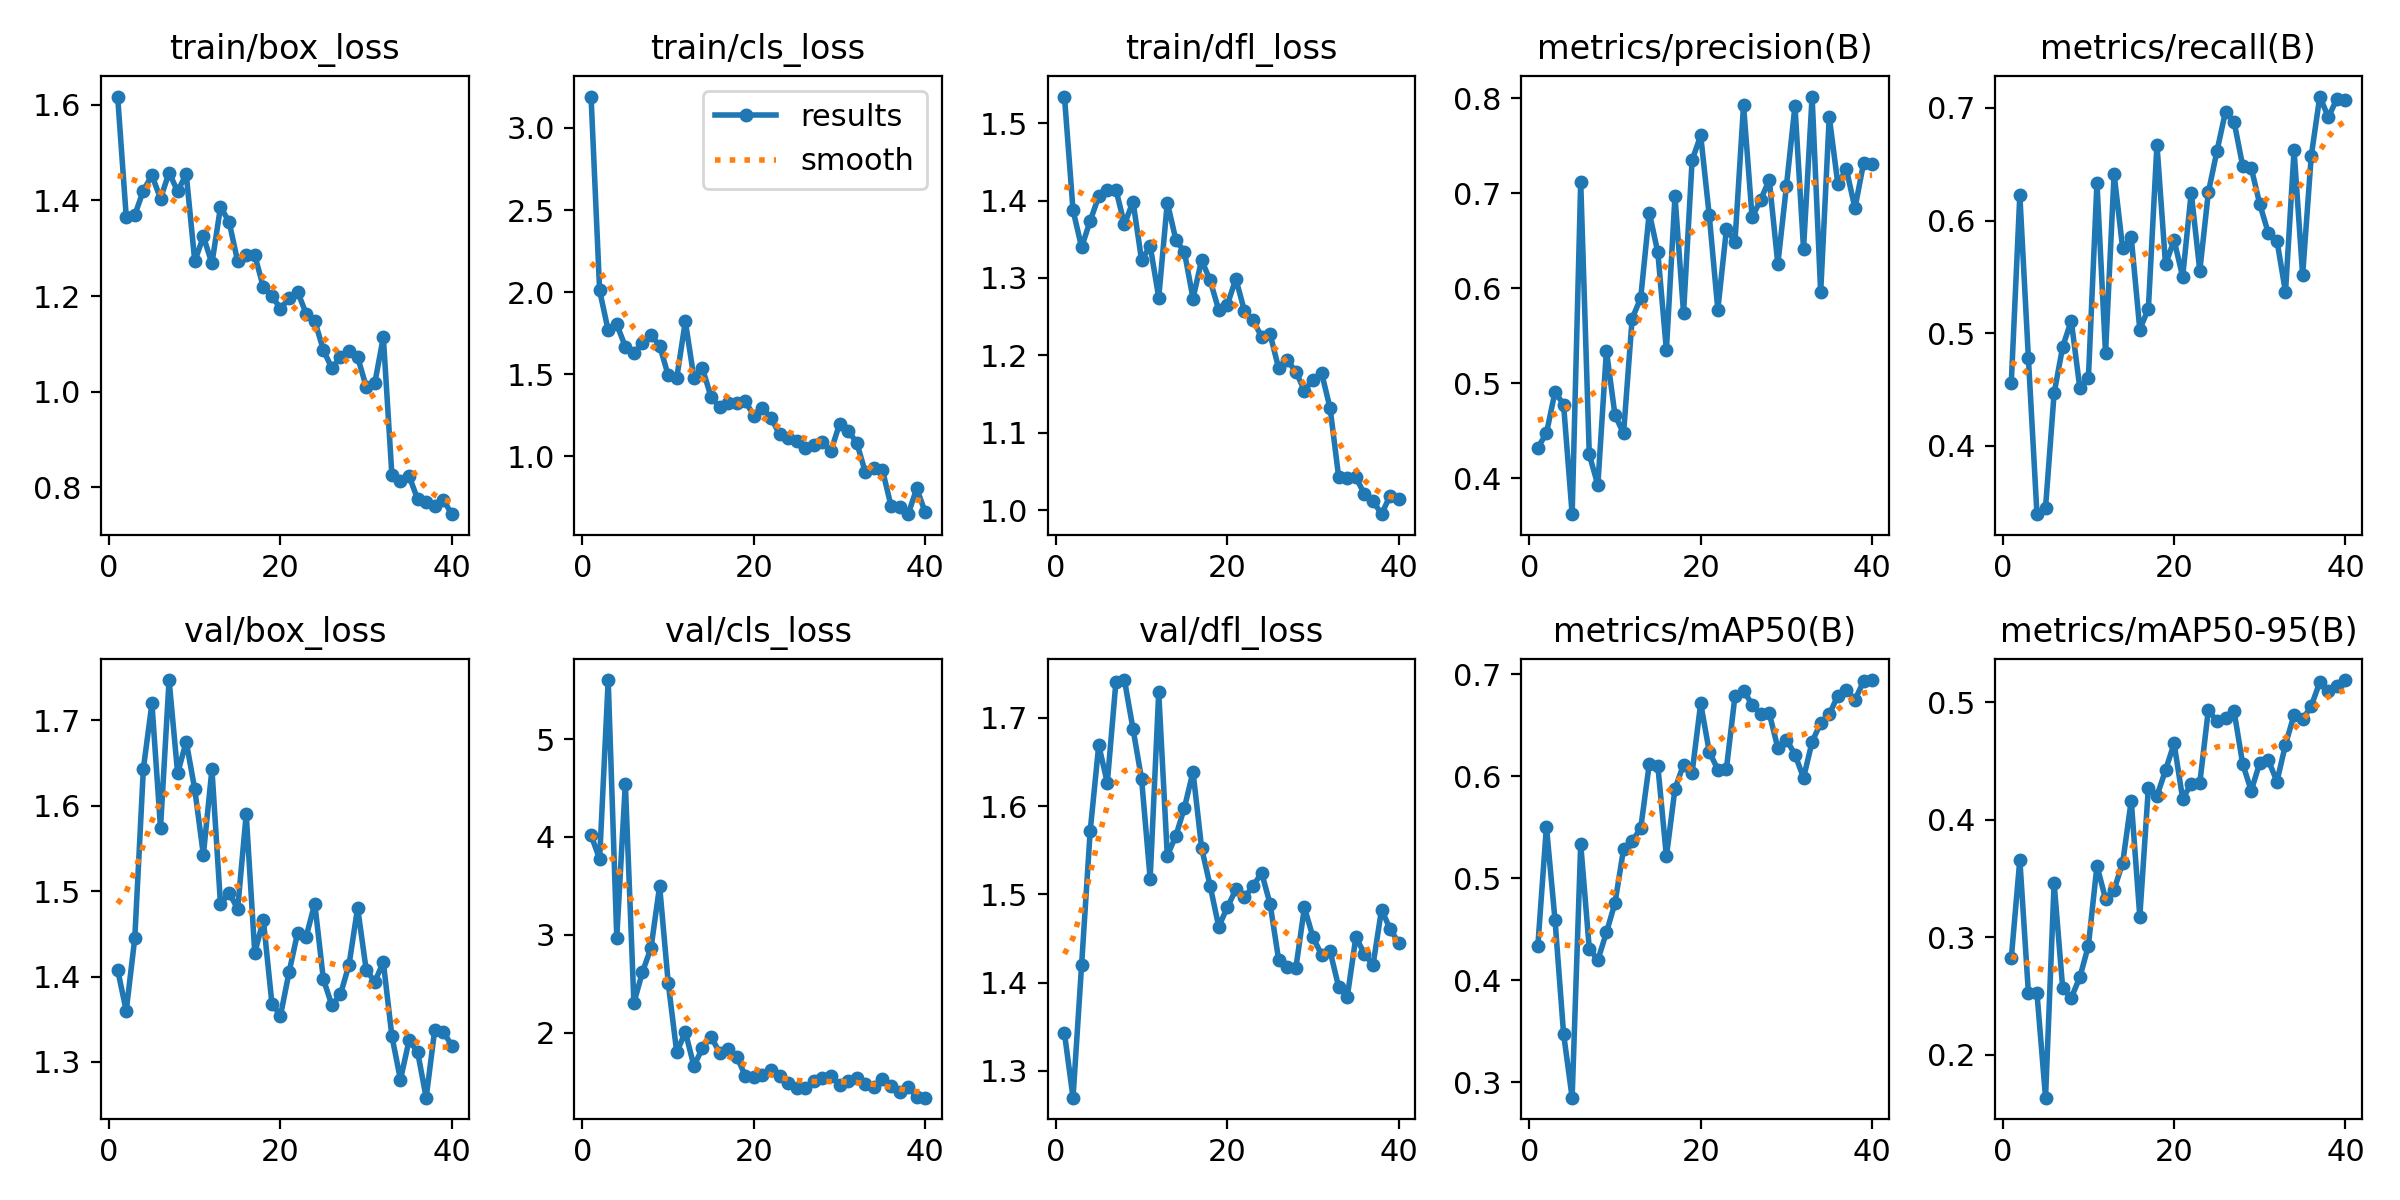

In [5]:
from IPython.display import Image, display

# Path to the image file
image_path = '/content/runs/detect/train/results.png'

# Display the image
display(Image(filename=image_path))